In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def Counting(filenames, level):
    file_list = sorted(glob.glob(filenames))
    cat1 = [] # >98 samples
    cat2 = [] # >= 90 samples
    cat3 = [] # < 90 samples
    for i in file_list:
        file = open(i)
        #print(i)
        data = [] #the list to categorise the number of samples with AS gene/junction into three groups: > 98; >90; other 
        for line in file:
            nsamples = int(line.split()[0])
            ngenes = int(line.split()[1])
            expression = line.split()[2]
            if nsamples <= 90: data.append(['cat3', ngenes, expression])
            elif nsamples > 98: data.append(['cat1', ngenes, expression])
            else: data.append(['cat2', ngenes, expression])
        df = pd.DataFrame.from_records(data)
        df.columns=['Samples', 'Genes', 'Expression']
        df_explevel = df[df['Expression'] == level] #to filter only records concerning the specific expression level
        explevel = df_explevel.groupby(['Samples'])['Genes'].sum()
        cat1.append(explevel[0])
        cat2.append(explevel[1])
        cat3.append(explevel[2])
    return(np.array(cat1), np.array(cat2), np.array(cat3))

In [7]:
def format_func_K(value, tick_number):
    # find number of multiples of pi/2
    if value % 1000 == 0:
        value = '{:.0f}'.format(value / 1000)
        return str(value) + "K"
    


In [17]:
typ = 'junctions' #other alternative: junctions 

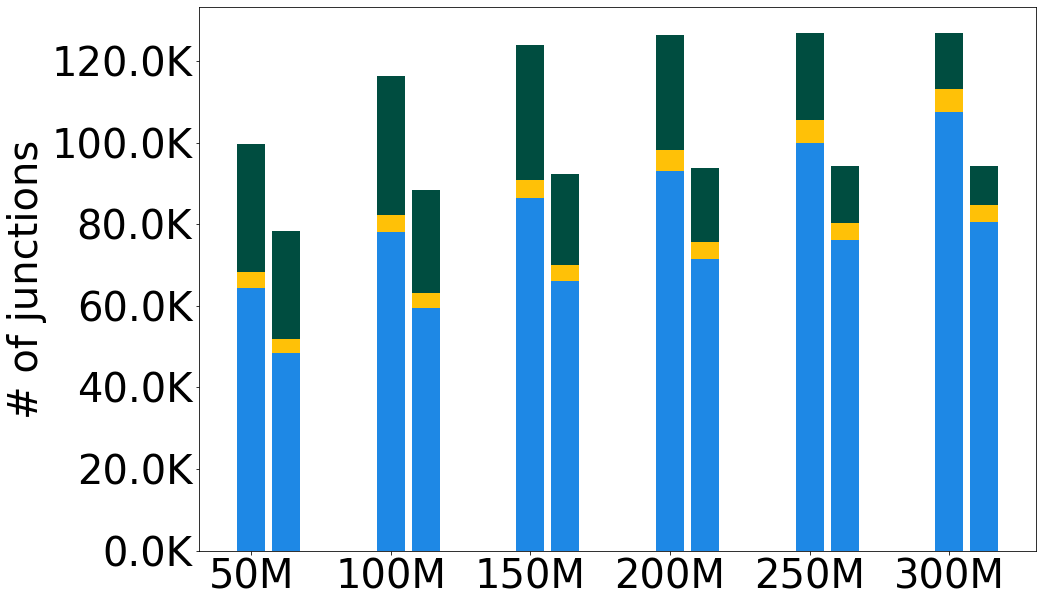

In [18]:
#Visualisation of Adipose data

level = 'high'
cat1_1, cat2_1, cat3_1 = Counting('Adipose1_*_x_' + typ + '_in_y_samples', level)
cat1_2, cat2_2, cat3_2 = Counting('Adipose2_*_x_' + typ + '_in_y_samples', level)

fig, ax = plt.subplots(figsize=(15, 10))

#plt.figure(figsize=(15,10))
barWidth = 0.5

ind1 = np.arange(12, step=2)
ind2 = [x + barWidth for x in ind1]

p1_5 = plt.bar(ind1, cat1_1, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind1, cat2_1, bottom=cat1_1, width=barWidth-0.1, color = '#FFC107')
p3_5 = plt.bar(ind1, cat3_1, bottom=cat2_1+cat1_1, width=barWidth-0.1, color = '#004D40')

p1_5 = plt.bar(ind2, cat1_2, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind2, cat2_2, bottom=cat1_2, width=barWidth-0.1, color = '#FFC107')
p3_5 = plt.bar(ind2, cat3_2, bottom=cat2_2+cat1_2, width=barWidth-0.1, color = '#004D40')

    

plt.xticks([r for r in [ 0, 2, 4, 6, 8, 10]], 
           ['50M', '100M', '150M', '200M', '250M', '300M'],
          fontsize=20)

#plt.legend((p1_5[0], p2_5[0], p3_5[0]), ('100', '>=90', '<90'), fontsize=40, loc='lower right')
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))
    
plt.ylabel('# of ' + typ, fontsize=40)
#plt.xlabel('Sequencing depth', fontsize=60)

if typ  == 'genes':
    if level == 'mid':
#        plt.title('Adipose' + ': 0.1<=TPM<0.5', fontsize=50)
        plt.ylim(0, 4500)
    if level == 'low':
#        plt.title('Adipose' + ':TPM<0.1', fontsize=60)
        plt.ylim(0, 7000)
    if level == 'high':
#        plt.title('Adipose' + ':TPM>=0.5', fontsize=60)
        plt.ylim(0, 13000)
        
#if typ  == 'junctions':
#    if level == 'mid':
#        plt.title('Adipose' + ': 0.1<=TPM<0.5', fontsize=50)
#    if level == 'low':
#        plt.title('Adipose' + ':TPM<0.1', fontsize=60)
#    if level == 'high':
#        plt.title('Adipose' + ':TPM>=0.5', fontsize=60)

plt.show()

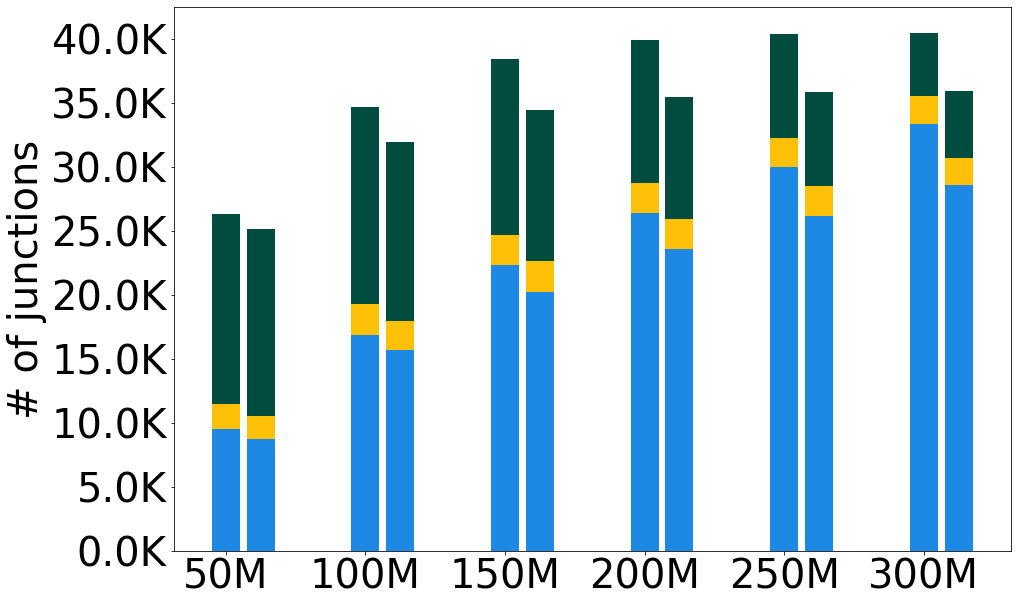

In [19]:
#Visualisation of Adipose data

level = 'mid'
cat1_1, cat2_1, cat3_1 = Counting('Adipose1_*_x_' + typ + '_in_y_samples', level)
cat1_2, cat2_2, cat3_2 = Counting('Adipose2_*_x_' + typ + '_in_y_samples', level)

fig, ax = plt.subplots(figsize=(15, 10))

#plt.figure(figsize=(15,10))
barWidth = 0.5

ind1 = np.arange(12, step=2)
ind2 = [x + barWidth for x in ind1]

p1_5 = plt.bar(ind1, cat1_1, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind1, cat2_1, bottom=cat1_1, width=barWidth-0.1, color = '#FFC107')
p3_5 = plt.bar(ind1, cat3_1, bottom=cat2_1+cat1_1, width=barWidth-0.1, color = '#004D40')

p1_5 = plt.bar(ind2, cat1_2, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind2, cat2_2, bottom=cat1_2, width=barWidth-0.1, color = '#FFC107')
p3_5 = plt.bar(ind2, cat3_2, bottom=cat2_2+cat1_2, width=barWidth-0.1, color = '#004D40')

    

plt.xticks([r for r in [ 0, 2, 4, 6, 8, 10]], 
           ['50M', '100M', '150M', '200M', '250M', '300M'],
          fontsize=20)

#plt.legend((p1_5[0], p2_5[0], p3_5[0]), ('100', '>=90', '<90'), fontsize=40, loc='lower right')
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))
    
plt.ylabel('# of ' + typ, fontsize=40)
#plt.xlabel('Sequencing depth', fontsize=60)

if typ  == 'genes':
    if level == 'mid':
#        plt.title('Adipose' + ': 0.1<=TPM<0.5', fontsize=50)
        plt.ylim(0, 4500)
    if level == 'low':
#        plt.title('Adipose' + ':TPM<0.1', fontsize=60)
        plt.ylim(0, 7000)
    if level == 'high':
#        plt.title('Adipose' + ':TPM>=0.5', fontsize=60)
        plt.ylim(0, 13000)
        
#if typ  == 'junctions':
#    if level == 'mid':
#        plt.title('Adipose' + ': 0.1<=TPM<0.5', fontsize=50)
#    if level == 'low':
#        plt.title('Adipose' + ':TPM<0.1', fontsize=60)
#    if level == 'high':
#        plt.title('Adipose' + ':TPM>=0.5', fontsize=60)

plt.show()

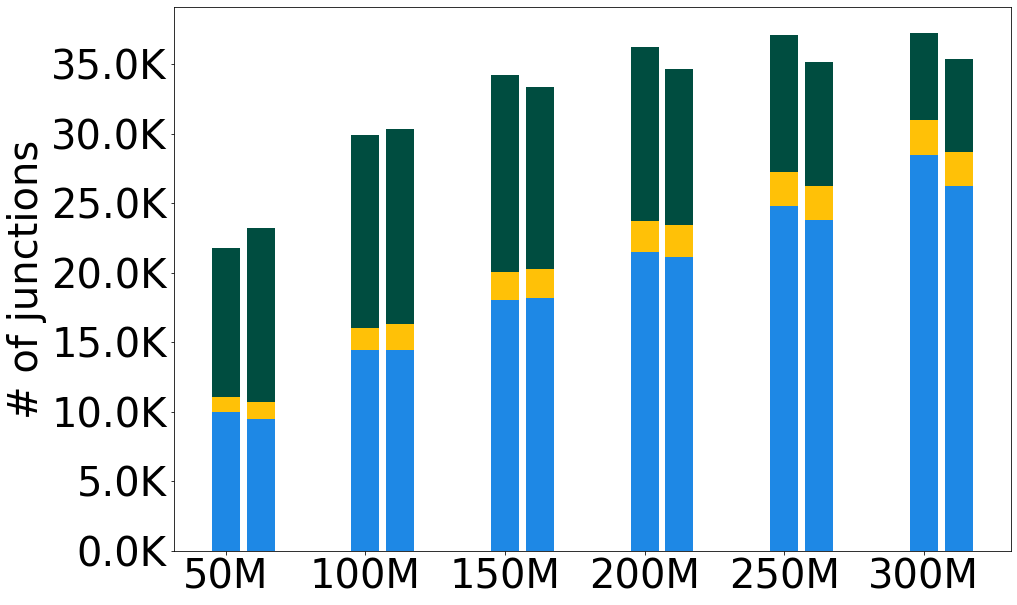

In [20]:
#Visualisation of Adipose data

level = 'low'
cat1_1, cat2_1, cat3_1 = Counting('Adipose1_*_x_' + typ + '_in_y_samples', level)
cat1_2, cat2_2, cat3_2 = Counting('Adipose2_*_x_' + typ + '_in_y_samples', level)

fig, ax = plt.subplots(figsize=(15, 10))

#plt.figure(figsize=(15,10))
barWidth = 0.5

ind1 = np.arange(12, step=2)
ind2 = [x + barWidth for x in ind1]

p1_5 = plt.bar(ind1, cat1_1, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind1, cat2_1, bottom=cat1_1, width=barWidth-0.1, color = '#FFC107')
p3_5 = plt.bar(ind1, cat3_1, bottom=cat2_1+cat1_1, width=barWidth-0.1, color = '#004D40')

p1_5 = plt.bar(ind2, cat1_2, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind2, cat2_2, bottom=cat1_2, width=barWidth-0.1, color = '#FFC107')
p3_5 = plt.bar(ind2, cat3_2, bottom=cat2_2+cat1_2, width=barWidth-0.1, color = '#004D40')

    

plt.xticks([r for r in [ 0, 2, 4, 6, 8, 10]], 
           ['50M', '100M', '150M', '200M', '250M', '300M'],
          fontsize=20)

#plt.legend((p1_5[0], p2_5[0], p3_5[0]), ('100', '>=90', '<90'), fontsize=40, loc='lower right')
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))
    
plt.ylabel('# of ' + typ, fontsize=40)
#plt.xlabel('Sequencing depth', fontsize=60)

if typ  == 'genes':
    if level == 'mid':
#        plt.title('Adipose' + ': 0.1<=TPM<0.5', fontsize=50)
        plt.ylim(0, 4500)
    if level == 'low':
#        plt.title('Adipose' + ':TPM<0.1', fontsize=60)
        plt.ylim(0, 7000)
    if level == 'high':
#        plt.title('Adipose' + ':TPM>=0.5', fontsize=60)
        plt.ylim(0, 13000)
        
#if typ  == 'junctions':
#    if level == 'mid':
#        plt.title('Adipose' + ': 0.1<=TPM<0.5', fontsize=50)
#    if level == 'low':
#        plt.title('Adipose' + ':TPM<0.1', fontsize=60)
#    if level == 'high':
#        plt.title('Adipose' + ':TPM>=0.5', fontsize=60)

plt.show()